In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import arviz as az
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cellbayesassay as cba
import os.path
import re
import attila_utils

In [2]:
data = cba.get_data('../../resources/cell-based-assays/raw-data-cleaned-by-tina-CO28151-draft1.xlsx', 'Data')
data

,Study,Experiment,Assay,Batch,Plate,TI,Name,conc,concentration,conc_log10,Activity
0,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,4010.00000
1,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,6280.00000
2,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,27790.00000
3,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,32560.00000
4,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,20670.00000
...,...,...,...,...,...,...,...,...,...,...,...
1633,CO28151,Aβ clearance (BV2 cells),Aβ42 SN,2,2,VC,,NaN,1.000000e-09,-9.0,53839.31290
1634,CO28151,Aβ clearance (BV2 cells),Aβ42 SN,2,2,VC,,NaN,1.000000e-09,-9.0,58911.37592
1635,CO28151,Aβ clearance (BV2 cells),Aβ42 SN,2,2,VC,,NaN,1.000000e-09,-9.0,50964.09701
1636,CO28151,Aβ clearance (BV2 cells),Aβ42 SN,2,2,VC,,NaN,1.000000e-09,-9.0,NaN


In [3]:
study = 'CO28151'
exper = 'Aβ clearance (BV2 cells)'
assay = 'Aβ42 Ly'
TI = 'TI13'
data_reshaped = cba.extract_regr_data(study, exper, assay, TI, data, return_data_reshaped=True)
data_reshaped

,Study,Experiment,Assay,Batch,Plate,TI,Name,conc,concentration,conc_log10,Activity,std_activity
1170,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.29,0.091680
1171,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.33,0.104326
1172,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.24,0.075873
1173,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.09,0.028453
1174,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.42,0.132778
1175,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.69,0.218136
1194,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.05,0.015807
1195,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.70,0.221297
1196,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.75,0.237104
1197,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.35,0.110649


In [4]:
maindir = '../../results/2024-02-14-cell-bayes/'

if not os.path.exists(maindir + 'idatas/fpaths.csv'):
    idatadf = cba.fit_multiple_units(data, unit_list=None)
    idatas = idatadf.idata
    fpathdf = cba.idatas_to_netcdf(idatas, subdir='idatas/', maindir=maindir)
    print('idatas written to netcdf')
else:
    idatas = cba.idatas_from_netcdf(subdir='idatas/', maindir=maindir)
    print('idatas read from netcdf')

idatas

idatas read from netcdf


study    experiment                assay    TI  
CO28151  Aβ clearance (BV2 cells)  Aβ42 Ly  TI1     (posterior, log_likelihood, sample_stats, obse...
                                            TI10    (posterior, log_likelihood, sample_stats, obse...
                                            TI11    (posterior, log_likelihood, sample_stats, obse...
                                            TI12    (posterior, log_likelihood, sample_stats, obse...
                                            TI13    (posterior, log_likelihood, sample_stats, obse...
                                                                          ...                        
         Aβ release (H4 cells)     Aβ42     TI5     (posterior, log_likelihood, sample_stats, obse...
                                            TI6     (posterior, log_likelihood, sample_stats, obse...
                                            TI7     (posterior, log_likelihood, sample_stats, obse...
                                 

## Fitted curves: posterior sample 

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:266: RuntimeWarning: overflow encountered in exp
  y_sigmoid_1_mean = y_1_mean + (y_0_mean - y_1_mean) / (1 + np.exp(k_mean * (xx - EC_50_mean)))


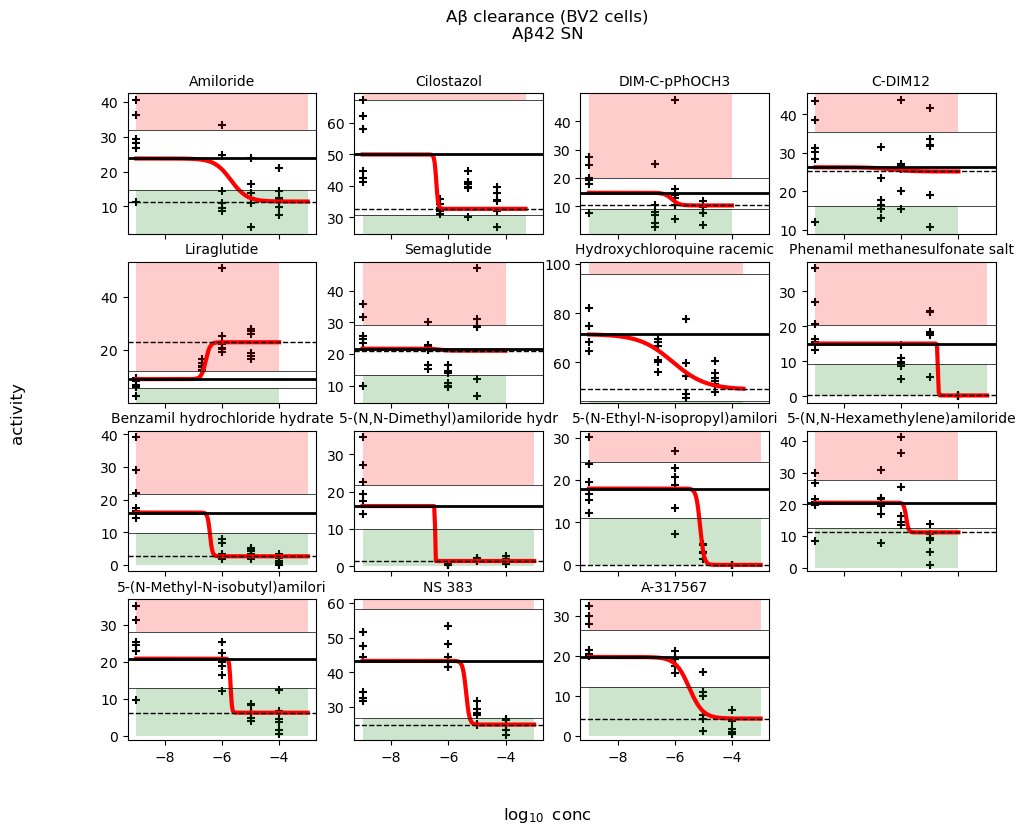

In [5]:
def assay_plotter(experiment, assay, plot_sampled_curves=False):
    unit_list = idatas.loc(axis=0)[:, experiment, assay, :].index.to_numpy()
    fig, ax = cba.plot_multiple_units(unit_list, data, idatas, plot_sampled_curves=plot_sampled_curves)
    fig.suptitle(experiment + '\n' + assay)
    return((fig, ax))

fig, ax = assay_plotter('Aβ clearance (BV2 cells)', 'Aβ42 SN')

(0.0, 2.0)

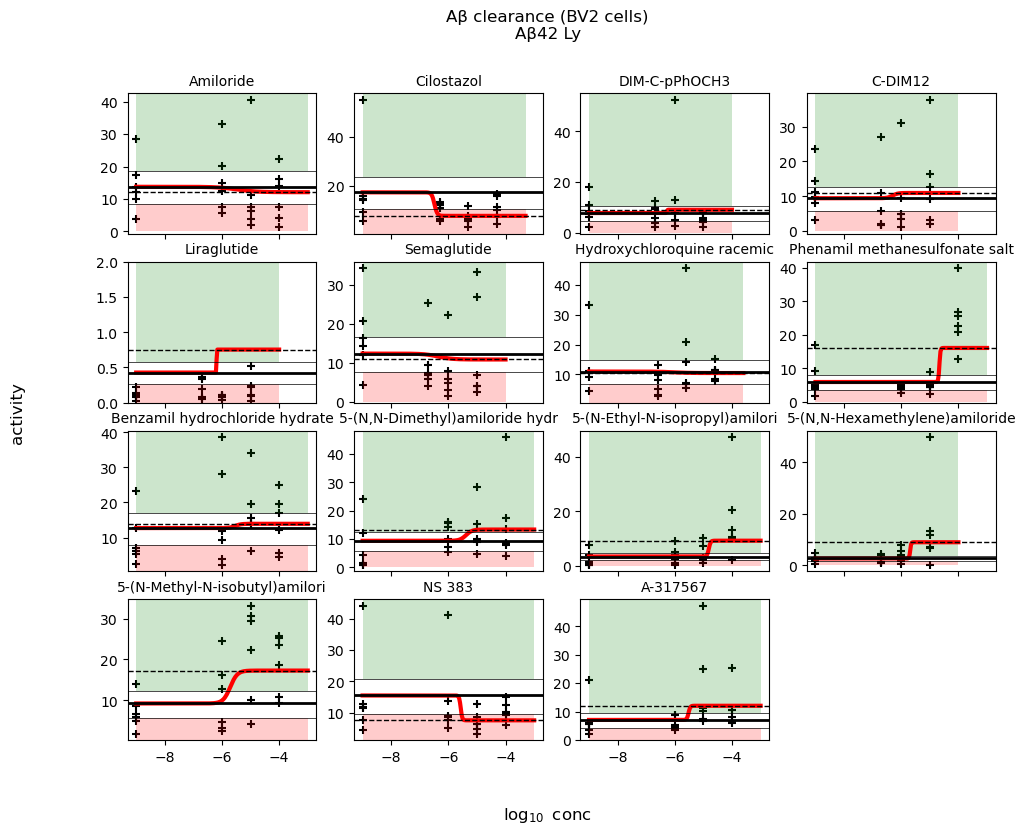

In [6]:
fig, ax = assay_plotter('Aβ clearance (BV2 cells)', 'Aβ42 Ly')
ax[1,0].set_ylim(0, 2)

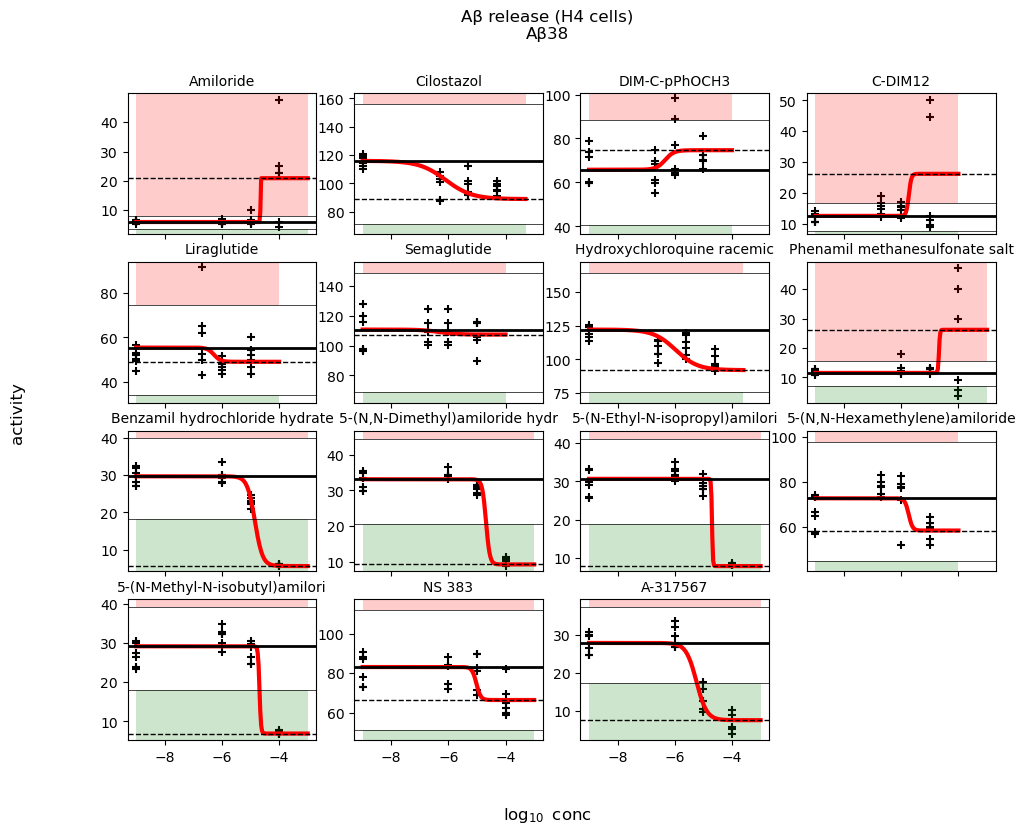

In [7]:
fig, ax = assay_plotter('Aβ release (H4 cells)', 'Aβ38')

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:266: RuntimeWarning: overflow encountered in exp
  y_sigmoid_1_mean = y_1_mean + (y_0_mean - y_1_mean) / (1 + np.exp(k_mean * (xx - EC_50_mean)))
/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:266: RuntimeWarning: overflow encountered in exp
  y_sigmoid_1_mean = y_1_mean + (y_0_mean - y_1_mean) / (1 + np.exp(k_mean * (xx - EC_50_mean)))


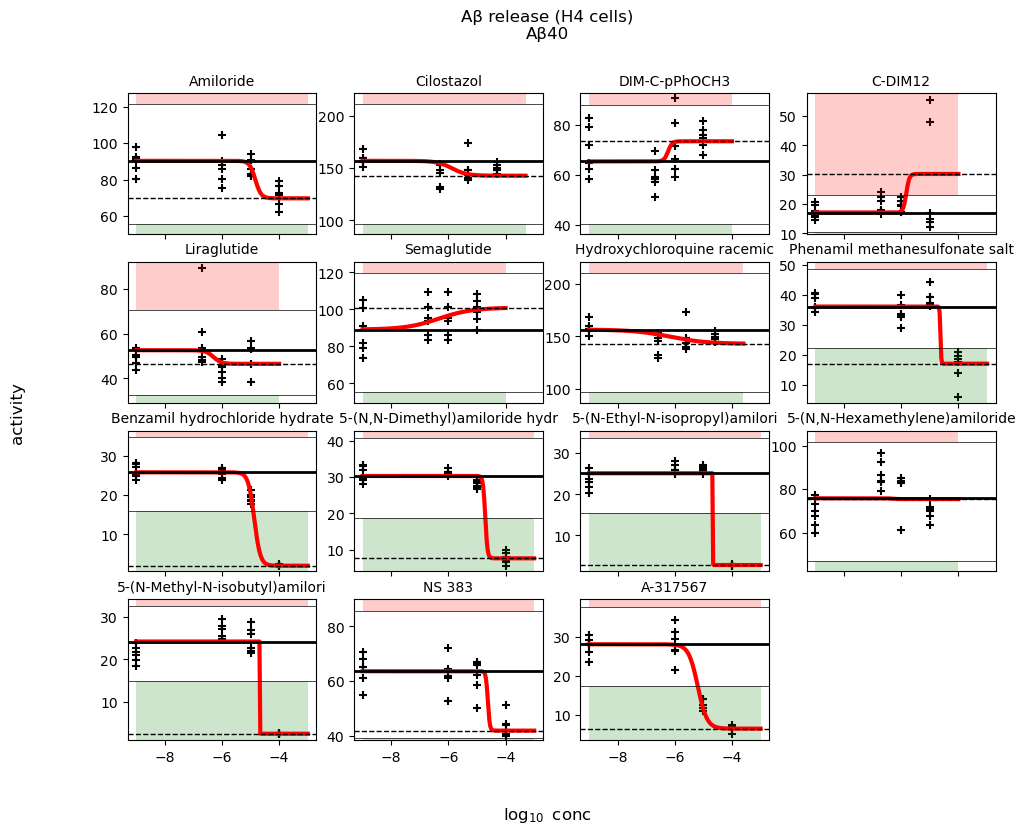

In [8]:
fig, ax = assay_plotter('Aβ release (H4 cells)', 'Aβ40')

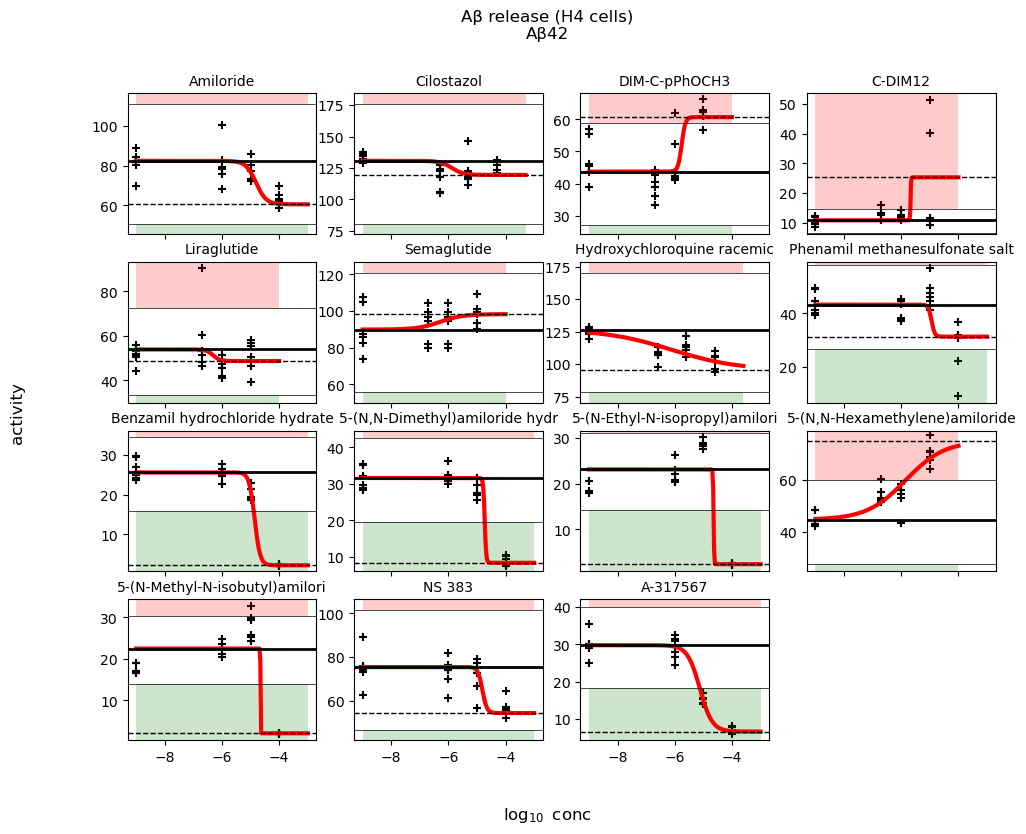

In [9]:
fig, ax = assay_plotter('Aβ release (H4 cells)', 'Aβ42')

## Fit diagnostics

In [10]:
def my_diagnostics(fun=az.ess, idatas=idatas, vmax=None, return_df=False):
    df = cba.get_diagnostics(idatas, fun=fun, return_df=True)
    df = df.stack().to_frame('value')
    index_labels = list(df.index.to_frame().columns)
    df = df.rename_axis(index_labels[:-1] + ['parameter'])
    df = pd.concat([df.index.to_frame(), df], axis=1).pivot(index=['study', 'experiment', 'assay', 'parameter'], columns='TI', values=df.columns)
    if return_df:
        return(df)
    precision = np.int64(3 - np.round(np.log10(df.mean().mean())))
    vmax = df.max().max() if vmax is None else vmax
    val = df.style.format(precision=precision).background_gradient(axis=None, vmin=df.min().min(), vmax=vmax, cmap='hot')
    return(val)

my_diagnostics(az.ess)

In [11]:
my_diagnostics(az.rhat, vmax=1.1)

In [12]:
my_diagnostics(az.mcse, vmax=10)

In [13]:
df = my_diagnostics(az.mcse, return_df=True).drop('k', level='parameter', axis=0)
df.style.format(precision=3).background_gradient(axis=None, vmin=df.min().min(), vmax=df.max().max(), cmap='hot')

In [14]:
%connect_info

{
  "shell_port": 57883,
  "iopub_port": 57884,
  "stdin_port": 57885,
  "control_port": 57887,
  "hb_port": 57886,
  "ip": "127.0.0.1",
  "key": "fa3640e1-41980ca4269a6350a0f0856a",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-02-14-cell-bayes/2024-02-14-cell-bayes.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-f0d4e49c-9176-4c7b-b731-c66c114b4d7d.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
